In [1]:
# Step 1: Build VGG16 pretrained model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG16
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
!git clone https://github.com/chandrikadeb7/Face-Mask-Detection.git

Cloning into 'Face-Mask-Detection'...
remote: Enumerating objects: 4590, done.
remote: Total 4590 (delta 0), reused 0 (delta 0), pack-reused 4590 (from 1)
Receiving objects: 100% (4590/4590), 186.72 MiB | 43.62 MiB/s, done.
Resolving deltas: 100% (271/271), done.
Updating files: 100% (4155/4155), done.


In [3]:
# Step 2: Modify the code to use medical-mask GitHub for training

# Set up dataset paths
train_dir = '/content/Face-Mask-Detection/dataset'

# Modify the data generators
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
model.fit(
    train_generator,
    epochs=10,
)


Found 4092 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 20/128 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.6646 - loss: 1.5880

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


128/128 ━━━━━━━━━━━━━━━━━━━━ 44s 225ms/step - accuracy: 0.8756 - loss: 0.5290
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 56s 130ms/step - accuracy: 0.9969 - loss: 0.0131
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 18s 134ms/step - accuracy: 0.9987 - loss: 0.0071
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.9999 - loss: 0.0026
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 1.0000 - loss: 0.0017
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 18s 137ms/step - accuracy: 1.0000 - loss: 6.0917e-04
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 20s 134ms/step - accuracy: 1.0000 - loss: 5.0408e-04
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 1.0000 - loss: 4.4352e-04
Epoch 9/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 18s 137ms/step - accuracy: 1.0000 - loss: 3.5682e-04
Epoch 10/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 20s 138ms/step - accuracy: 1.0000 - loss: 2.2732e-04


Image URL 1 :https://raw.githubusercontent.com/chandrikadeb7/Face-Mask-Detection/refs/heads/master/dataset/without_mask/0.jpg
Image URL 2 :https://na.cx/i/eqzQJYw.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


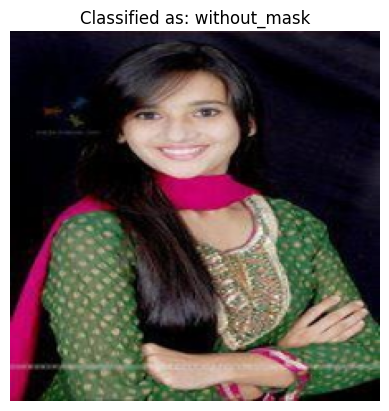

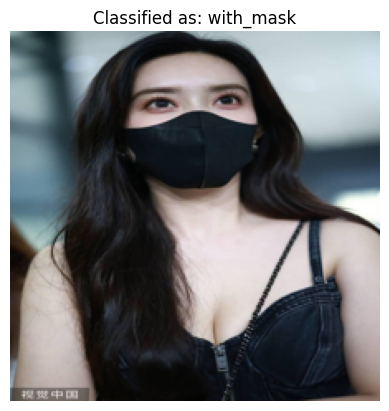

In [9]:
# Step 3: Allow program to input image URLs and classify which class they are
import requests
from PIL import Image, UnidentifiedImageError
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

def test_images(image_urls, model, class_names):
    images = []
    predicted_classes = []
    for image_url in image_urls:
        try:
            response = requests.get(image_url)
            img = Image.open(BytesIO(response.content)).resize((224, 224))
            img_array = np.array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)
            predictions = model.predict(img_array)
            predicted_class = class_names[np.argmax(predictions)]
            images.append(img)
            predicted_classes.append(predicted_class)
        except UnidentifiedImageError:
            print(f'Error: Cannot identify image from URL {image_url}')
    return images, predicted_classes

# Example usage
image_urls = [input('Image URL 1 :'),
        input('Image URL 2 :')]
        # https://raw.githubusercontent.com/chandrikadeb7/Face-Mask-Detection/refs/heads/master/dataset/without_mask/0.jpg
        # https://na.cx/i/eqzQJYw.jpg
class_names = list(train_generator.class_indices.keys())
images, predicted_classes = test_images(image_urls, model, class_names)
for i, img in enumerate(images):
    plt.figure()
    plt.imshow(img)
    plt.title(f'Classified as: {predicted_classes[i]}')
    plt.axis('off')
plt.show()
